# Module 4: 数据预处理 Data Preprocessing


以下教程包含用于数据预处理的Python示例。 可以从http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.ipynb 下载笔记本。

数据预处理包含用于清除、选择和转换数据以改善数据挖掘分析的广泛技术。请仔细阅读下面的分步说明。 要执行代码，请单击相应的单元格，然后同时按SHIFT-ENTER键。

## 4.1 数据质量问题

不良的数据质量可能会对数据挖掘产生不利影响。 常见的数据质量问题包括噪声、离群值、缺失值和重复数据。 本节介绍减轻某些数据质量问题的Python代码示例。 我们从UCI机器学习存储库中的示例数据集开始，该数据集包含有关乳腺癌患者的信息。 我们将首先使用Pandas的read_csv()函数下载数据集，并显示其前5个数据点。

**<font color="red">代码：</font>**

**<font color ='red'>任务：</font>** 请尝试使用tutorial3中的方法对该数据进行探索。

**<font color ='red'>思考：</font>** 请尝试阐述数据质量问题（噪声、离群值、缺失值和重复数据等）可能会对数据挖掘任务造成哪些影响。


In [1]:
import pandas as pd
data = pd.read_csv('./breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### 4.1.1 缺失值 Missing Values


在数据挖掘的数据集中，缺少一个或多个属性值的对象并不罕见。 在某些情况下，没有收集信息； 在其他情况下，某些属性不适用于数据实例。 本节介绍有关处理缺失值的不同方法的示例。

根据数据描述 (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original) 可知，缺失值被编码为NaN。我们可以计算数据每一列中缺失值的数量。


**<font color="red">代码：</font>**

In [2]:
import numpy as np

data = data.replace('?', np.nan)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


注意只有 “Bare Nuclei” 列包含缺失值。 在以下示例中，“Bare Nuclei” 列中的缺失值被该列的中值代替。 接下来用数据子集展示替换前后的值。

**<font color="red">代码：</font>**

In [3]:
data2 = data['Bare Nuclei'].map(lambda x: float(x) if isinstance(x, str) else x)

print('Before replacing missing values:')
print(data2[20:25])

data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20    10.0
21     7.0
22     1.0
23     NaN
24     1.0
Name: Bare Nuclei, dtype: float64

After replacing missing values:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


除了替换丢失的值，另一种常见方法是丢弃包含丢失的值的数据点。 通过对Dataframe使用dropna() 函数可以轻松完成此操作。

**<font color="red">代码：</font>**

In [4]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


### 4.1.2 离群点 Outliers

离群值是具有与数据集其余部分明显不同的特征的数据实例。 在下面的示例代码中，我们将绘制一个箱线图以标识表中包含异常值的列。 请注意，所有列中的值（“Bare Nuclei”除外）最初都存储为 “int64”，而“Bare Nuclei”列中的值则存储为字符串对象（因为该列最初包含诸如“？”之类的字符串）代表缺失值）。 因此，我们必须在创建箱线图之前先将列转换为数值。 否则，在绘制箱线图时将不会显示该列。

**<font color="red">代码：</font>**

**<font color ='red'>思考：</font>** 请尝试分析下面的箱型图（boxplot）展示出了哪些信息？

<Axes: >

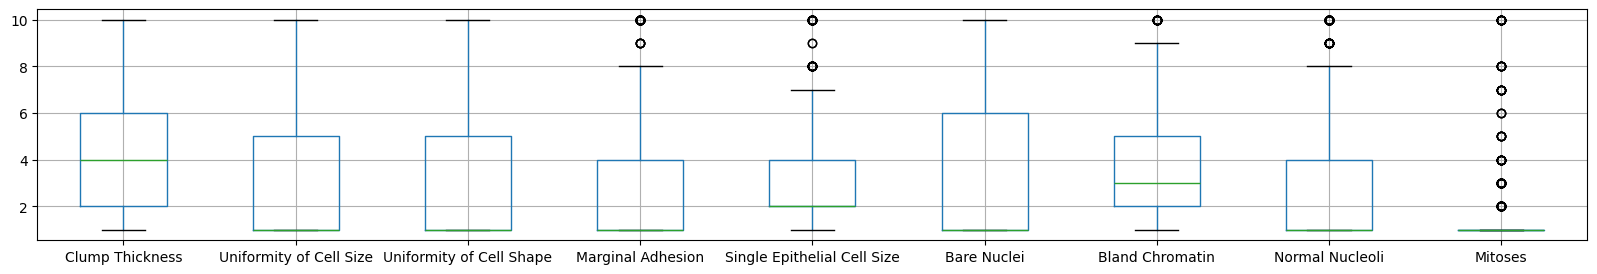

In [5]:
%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

箱线图表明只有5列（Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses）包含异常高的值。 要丢弃异常值，我们可以计算每个属性的Z得分（Z-score），并删除包含Z得分异常高或低的属性的实例（例如，如果Z> 3或Z <= -3）。


**<font color="red">代码：</font>**

以下代码显示了标准化数据列的结果。 请注意，缺失值（NaN）不受标准化过程的影响。

In [6]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


**<font color="red">代码：</font>**

以下代码显示了丢弃 Z> 3 或 Z <= -3 的列的结果。


In [7]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


### 4.1.3 重复数据 Duplicate Data

Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. The term deduplication is often used to refer to the process of dealing with duplicate data issues. 
一些数据集，尤其是通过合并多个数据源获得的数据集，可能包含重复项或接近重复的实例。 “去重复（deduplication）” 一词通常用于指代处理重复数据问题的过程。

**<font color="red">代码：</font>**

在以下示例中，我们首先检查数据集中是否存在重复实例。

**<font color ='red'>任务：</font>** 请尝试找到重复数据的行号（索引）。

In [8]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(dups[dups==True])
data.loc[[11,28]]

Number of duplicate rows = 236
28     True
35     True
48     True
64     True
66     True
       ... 
686    True
688    True
690    True
692    True
695    True
Length: 236, dtype: bool


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


duplicated() 函数将返回一个布尔数组，该数组指示每行是否是表中上一行的重复。 结果表明，乳腺癌数据集中有236个重复行。 例如，行索引为11的实例与行索引为28的实例具有相同的属性值。尽管此类重复行可能对应于不同个体的样本，但在此假设示例中，我们假设重复样本是从同一个体获取的样本，并在下面说明如何删除重复的行。

**<font color="red">代码：</font>**

In [9]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


## 4.2 聚合Aggregation


数据聚合是一个预处理任务，其中将两个或多个对象的值组合为一个对象。 聚集的动机包括（1）减小要处理的数据的大小；（2）更改分析的粒度（从细规模到较粗规模）；以及（3）改善数据的稳定性。

在下面的示例中，我们将使用位于底特律都会机场的气象站的每日降水（precipitation）时间序列数据。 原始数据来自气候数据在线网站（ https://www.ncdc.noaa.gov/cdo-web/ ） 。 每天的降水时间序列将与每月的值进行比较。


**<font color="red">代码：</font>** 下面的代码将加载降水时间序列数据并绘制其每日时间序列的折线图。

**<font color ='red'>思考：</font>** 请对比下述三种聚合结果，并简述其特点。

**<font color ='red'>任务：</font>** 请自己构建一个序列数据，并使用不同的方法对其进行聚合。

Text(0.5, 1.0, 'Daily Precipitation (variance = 0.0530)')

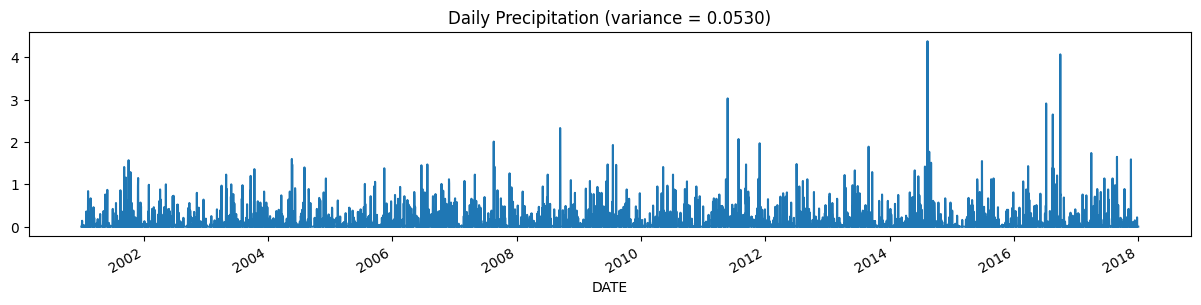

In [10]:
daily = pd.read_csv('DTW_prec.csv', header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

观察到每天的时间序列似乎很混乱，并且从一个时间步长到另一个时间步长的降雨量变化很大。 可以按月对时间序列进行分组和汇总，以获得每月的总降水量值。 与每日时间序列相比，所得的时间序列似乎更平滑地变化。

**<font color="red">代码：</font>**

C:\Users\Mantle Bao\AppData\Local\Temp\ipykernel_22392\2107550002.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = daily.groupby(pd.Grouper(freq='M')).sum()


Text(0.5, 1.0, 'Monthly Precipitation (variance = 2.4241)')

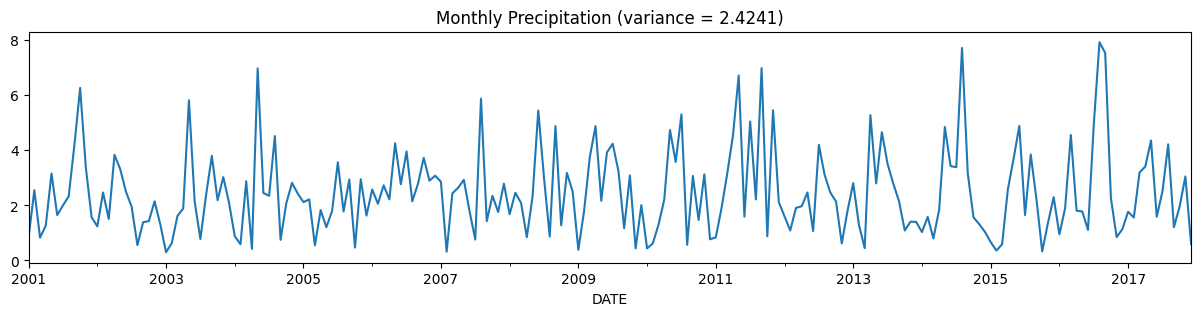

In [11]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

在下面的示例中，按年对每日降水时间序列进行分组和汇总，以获得年度降水值。

**<font color="red">代码：</font>**

C:\Users\Mantle Bao\AppData\Local\Temp\ipykernel_22392\2798781123.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual = daily.groupby(pd.Grouper(freq='Y')).sum()


Text(0.5, 1.0, 'Annual Precipitation (variance = 23.6997)')

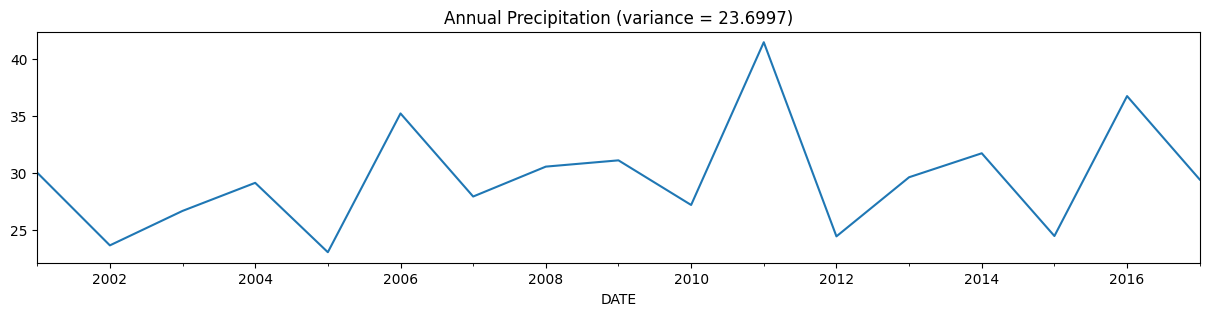

In [12]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

## 4.3 抽样 Sampling

抽样是一种通常用于促进（1）进行探索性数据分析的数据精简和将算法扩展应用到大数据场景的方法，以及（2）量化由于数据分布变化而引起的不确定性。 有多种方法可用于数据采样，例如不放回抽样（sampling without replacement），即从数据集中删除每个选定的实例；有放回抽样（sampling with replacement），不移除每个选定的实例，从而允许在样本中多次选择它。 。

在下面的示例中，我们将对从UCI机器学习存储库中获得的乳腺癌数据集进行替换和不替换采样。


**<font color="red">代码：</font>**

我们最初显示表的前五个记录。

**<font color ='red'>任务：</font>** 请尝试不同的采样方式和采样数量。

In [13]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


在下面的代码中，从原始数据中随机选择（不放回抽样）大小为3的样本。

**<font color="red">代码：</font>**

In [14]:
sample = data.sample(n=3)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
573,1,1,1,1,2,1,2,1,1,2
55,10,6,6,3,4,5,3,6,1,4
457,8,8,9,6,6,3,10,10,1,4


在下一个示例中，我们随机选择数据的1％（不放回）并显示选定的样本。 函数的random_state参数指定随机数生成器的种子值（seed value）。

**<font color="red">代码：</font>**

In [15]:
sample = data.sample(frac=0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1,1,1,1,2
417,1,1,1,1,2,1,2,1,1,2
606,4,1,1,2,2,1,1,1,1,2
349,4,2,3,5,3,8,7,6,1,4
134,3,1,1,1,3,1,2,1,1,2
502,4,1,1,2,2,1,2,1,1,2
117,4,5,5,10,4,10,7,5,8,4


最后，我们执行又放回抽样，以创建一个样本，其大小等于整个数据的1％。我们可以通过增加样本大小来观察样本中的重复实例。

**<font color="red">代码：</font>**

In [16]:
sample = data.sample(frac=0.1, replace=True, random_state=1)
# pd.options.display.max_columns = None # 展示所有数据
# type(sample)
# sample.sort_index()
sample
# sample[:50]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...
126,7,5,3,7,4,10,7,5,5,4
279,10,5,7,3,3,7,3,3,8,4
381,10,6,3,6,4,10,7,8,4,4
356,5,3,3,1,3,3,3,3,3,4


## 4.4 离散化 Discretization

离散化是数据预处理步骤，通常用于将连续值属性转换为分类属性。 以下示例说明了两种简单但广泛使用的无监督离散化方法（等宽和等深）应用于数据集的“Clump Thickness”属性。

首先，我们绘制一个直方图以显示属性值的分布。 value_counts() 函数也可以用于计算每个属性值的频率。

**<font color="red">代码：</font>**

**<font color ='red'>任务：</font>** 请尝试用直方图展示等宽和等深离散化后的数据。

Clump Thickness
5     130
3     108
6      34
4      80
8      46
1     145
2      50
7      23
10     69
9      14
Name: count, dtype: int64

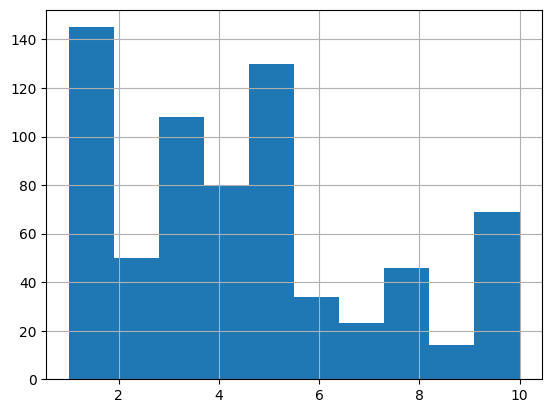

In [17]:
data['Clump Thickness'].hist(bins=10) # 
data['Clump Thickness'].value_counts(sort=False)

对于等宽方法，我们可以应用cut() 函数将属性离散化为4个类似间隔宽度的bin。 value_counts() 函数可用于确定每个bin中的实例数。

**<font color="red">代码：</font>**

In [18]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)


Clump Thickness
(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: count, dtype: int64


对于等频率方法，可以使用qcut() 函数将值划分为4个bin，以便每个bin具有几乎相同数量的实例。

**<font color="red">代码：</font>**

In [19]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

Clump Thickness
(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: count, dtype: int64

## 4.5 主成分分析 Principal Component Analysis

 
主成分分析（PCA）是一种经典降维方法，可通过将数据从其原始的高维空间投影到低维空间来减少数据中的属性数量。 PCA创建的新属性（也称为成分，component）具有以下属性：（1）它们是原始属性的线性组合，（2）它们彼此正交（垂直），并且（3）捕获数据的最大变化量。

下面的示例说明了PCA在图像数据集中的应用。 有16个RGB图像文件（3通道），每个文件的大小为111 x 111像素。 下面的示例代码将读取每个图像文件，并将RGB图像转换为111 x 111 x 3 = 36963特征值。 这将创建一个大小为16 x 36963的数据矩阵。


**<font color="red">代码：</font>**

**<font color ='red'>任务：</font>** 请尝试在其它数据集上运行PCA算法。

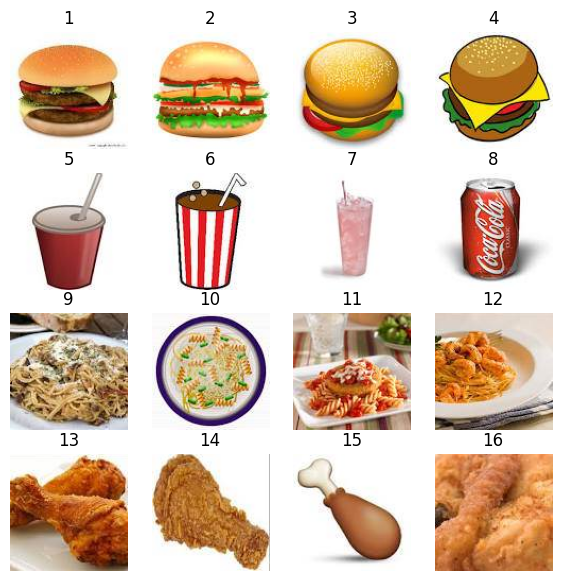

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))

for i in range(1,numImages+1):
    filename = 'pics/Picture'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

使用PCA，数据矩阵被投影到其前两个主要成分。 原始图像数据的投影值存储在名为projected的pandas DataFrame对象中。

**<font color="red">代码：</font>**

In [21]:
import pandas as pd
from sklearn.decomposition import PCA # 用到了scikit-learn

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','drink','drink','drink','drink',
                      'pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken', 'chicken']
projected

,pc1,pc2,food
1,1592.889847,-6651.434921,burger
2,513.051013,-6332.932839,burger
3,-963.335974,-7210.075091,burger
4,-2165.047434,-9039.067017,burger
5,7842.493639,1064.597548,drink
6,8458.900694,5385.687544,drink
7,11181.803282,5359.735458,drink
8,6830.991721,-1129.838915,drink
9,-7639.871263,5060.131115,pasta
10,704.468221,532.049762,pasta


最后，我们绘制一个散点图以显示投影值。 观察到汉堡、饮料和意大利面的图像都投影到相同的区域。 但是，炸鸡的图像（在图中显示为黑色正方形）更难区分。

**<font color="red">代码：</font>**

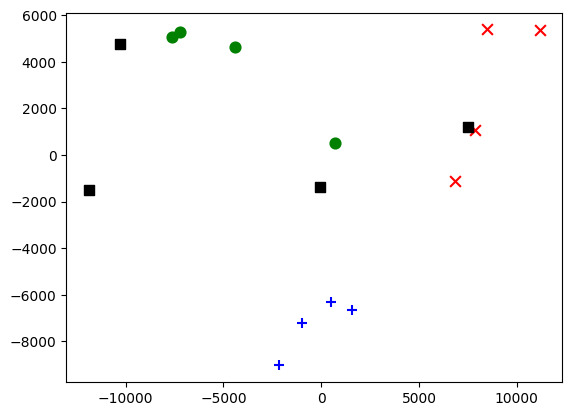

In [22]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

## 4.6 总结

本教程介绍了用于数据预处理的Python编程示例，包括数据清理（以处理缺失值并消除异常值和重复数据）、聚合、采样、离散化和使用主成分分析的降维。

**<font color='blue'>引用：</font>**

1. Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

2. Mangasarian, O.L. and Wolberg, W. H. (1990). "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, pp 1 & 18.

3. Wolberg, W.H. and Mangasarian, O.L. (1990). "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, pp 9193-9196. 

4. Climate Data Online [https://www.ncdc.noaa.gov/cdo-web/]. 